In [122]:
# loading the dataset from tensorflow directly
import tensorflow as tf

fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_dataset.load_data()

In [123]:
# class names are not included in the dataset's labels, so we include them here to make plotting in the future easier
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

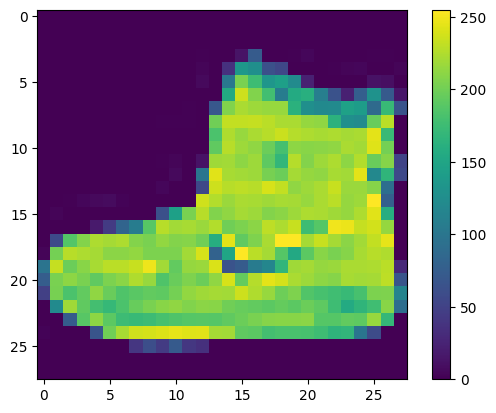

In [124]:
# printing one of the images, to verify that we loaded the dataset correctly
from matplotlib import pyplot as plt 
clothing_item = train_images[0]
plt.figure()
plt.imshow(clothing_item)
plt.colorbar()
plt.show()

In [125]:
# normalizing pixel data to be in the range from 0-1 in order to improve training later on
train_images = train_images / 255.0
test_images = test_images / 255.0

In [126]:
# creating models for classifying the data and compiling it
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Some of this code is generated by chatGPT, in particular the code for generating a confusion matrix

def train_model(layers):
    model = tf.keras.Sequential([tf.keras.layers.Input(shape=(28,28)), tf.keras.layers.Flatten()])
    for neurons in layers:
        add_layer = tf.keras.layers.Dense(neurons, activation="relu")
        model.add(add_layer)
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(optimizer="adam",
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics=["accuracy"])
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy: {test_acc}")

    # CHATGPT GENERATED CODE 

    # Step 1: Make Predictions
    # Predict the classes for the test images
    predictions = model.predict(test_images)  # Assuming test_images is your test data
    predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

    # Step 2: Generate Confusion Matrix
    # `clothing_labels` should be the true labels for your test dataset
    # Generate confusion matrix
    cm = confusion_matrix(test_labels, predicted_classes)

    # Step 3: Visualize the Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7713 - loss: 0.6477
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8600 - loss: 0.3783
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8748 - loss: 0.3361
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8874 - loss: 0.3069
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8924 - loss: 0.2873
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8945 - loss: 0.2789
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9008 - loss: 0.2629
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9038 - loss: 0.2509
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9108 - loss: 0.2365
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9105 - loss: 0.2339
313/313 - 0s - 983us/step - accuracy: 0.8875 - loss: 0.3288
Test accuracy: 0.887499988079071
313/313 ━━━━━━━━━━━━━━━━━━

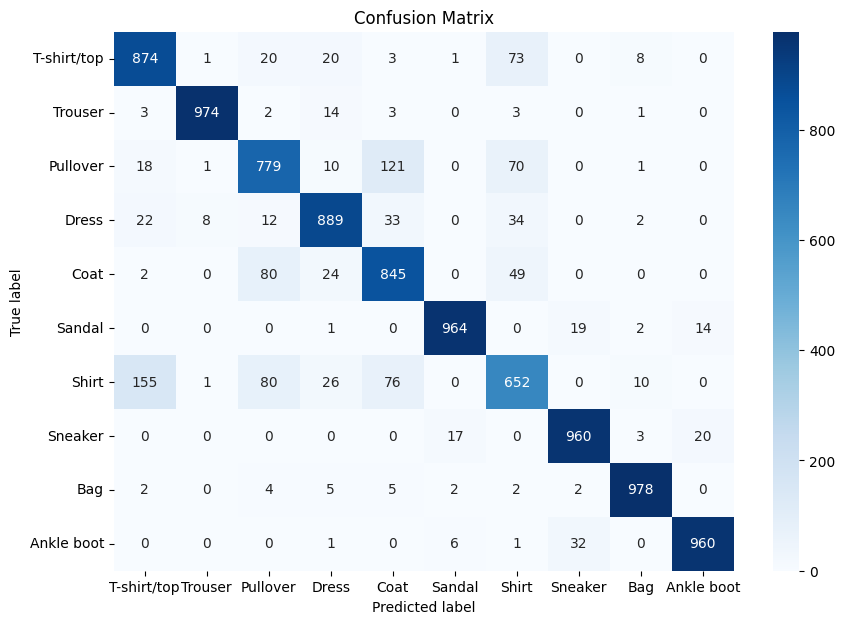

In [127]:
train_model([64, 256])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7671 - loss: 0.6494
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8617 - loss: 0.3800
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8823 - loss: 0.3172
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8897 - loss: 0.2966
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8927 - loss: 0.2873
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8961 - loss: 0.2731
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9010 - loss: 0.2613
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9018 - loss: 0.2572
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9044 - loss: 0.2472
313/313 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.3503
Test accuracy: 0.8763999938964844
313/313 ━━━━━━━━━━━━━━━━━━━

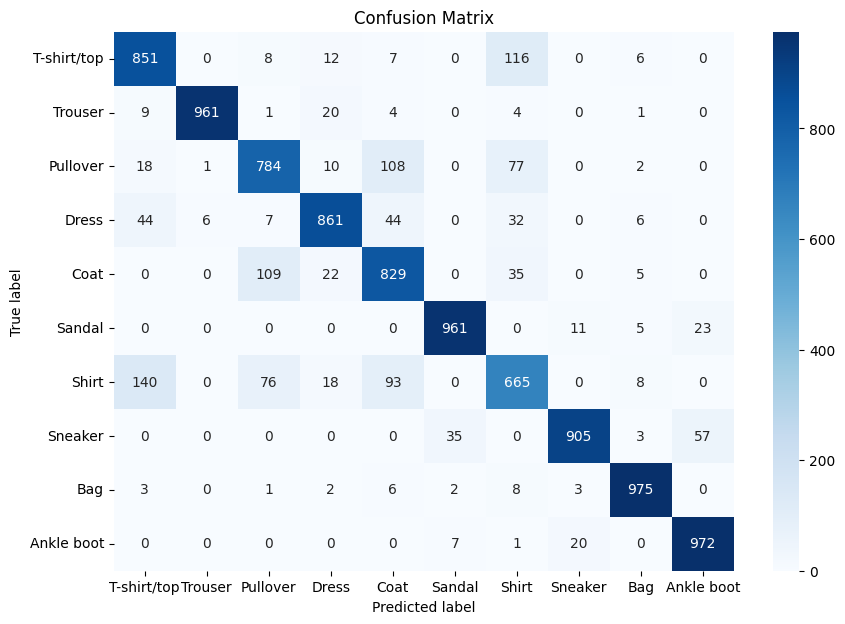

In [128]:
train_model([64,64,256])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7732 - loss: 0.6246
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8607 - loss: 0.3729
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8741 - loss: 0.3382
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8840 - loss: 0.3112
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8920 - loss: 0.2888
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8977 - loss: 0.2713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8996 - loss: 0.2654
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9063 - loss: 0.2542
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9092 - loss: 0.2401
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9109 - loss: 0.2335
313/313 - 0s - 1ms/step - accuracy: 0.8777 - loss: 0.3610
Test accuracy: 0.8776999711990356
313/313 ━━━━━━━━━━━━━━━━━━━

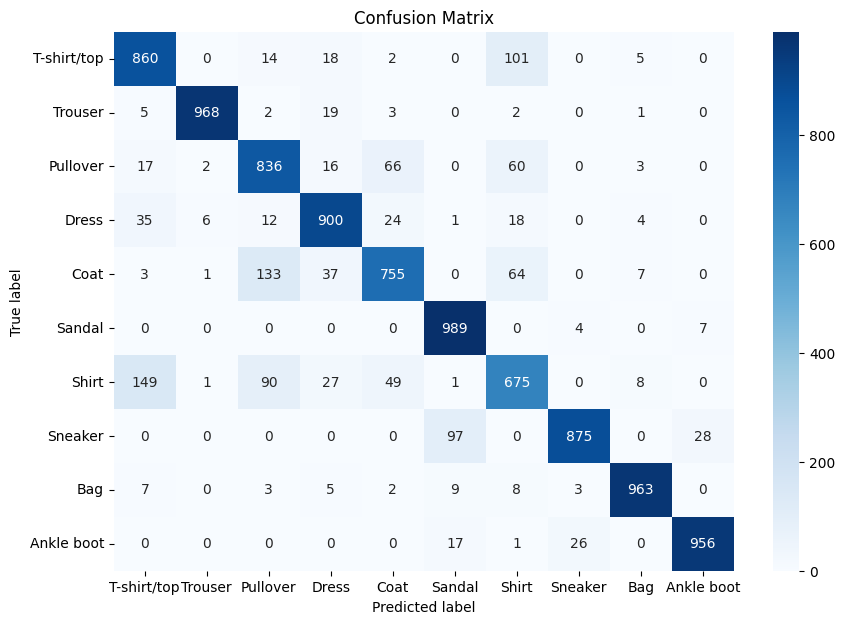

In [129]:
train_model([256, 64, 512])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7804 - loss: 0.6122
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8648 - loss: 0.3691
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8797 - loss: 0.3270
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8873 - loss: 0.3017
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8930 - loss: 0.2885
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8982 - loss: 0.2710
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9052 - loss: 0.2528
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9061 - loss: 0.2462
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9118 - loss: 0.2340
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9132 - loss: 0.2252
313/313 - 0s - 985us/step - accuracy: 0.8810 - loss: 0.3518
Test accuracy: 0.8809999823570251
313/313 ━━━━━━━━━━━━━━━━━

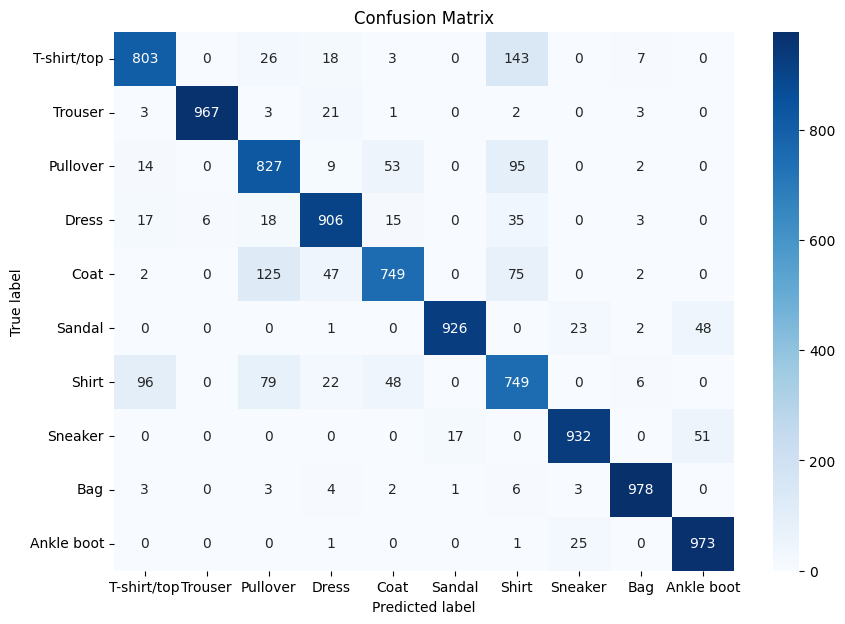

In [130]:
train_model([128, 256])